# Observations and Insights

In [160]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [161]:
#Combining the data into a single dataset
merg_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#Displaying the data table for preview
merg_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [162]:
#Checking the number of mice 
merg_df2 = merg_df.loc[:, ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
merg_df2 = merg_df2.drop_duplicates(subset=['Mouse ID'])
count = merg_df2['Mouse ID'].count()
nunique = merg_df2['Timepoint'].nunique()
total_mice = count - nunique
pd.DataFrame({'Number Of Mice': [total_mice]})

,Number Of Mice
0,248


In [163]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and TImepoint
merg_df = merg_df[merg_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mouse_data = merg_df.set_index('Mouse ID')
time_point_data = mouse_data["Timepoint"]
mouse_summary = pd.DataFrame({'Timepoint': time_point_data})

mouse_summary

,Timepoint
Mouse ID,
g989,0
g989,0
g989,5
g989,5
g989,10
g989,10
g989,15
g989,15
g989,20


In [164]:
#Getting all the data for the duplicatemouse ID
#pd.concat(g for _, g in merg_df.groupby(['Mouse ID', 'Timepoint']) if len(g) > 1)

In [165]:
#Getting all the data for the duplicatemouse ID
dup_df = merg_df[merg_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [166]:
#Creating a clean DataFrame by dropping the duplicate mouse by it's ID
merg_df3 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merg_df3 = merg_df3[merg_df3.duplicated(subset=['Timepoint'])]
mouse_data = merg_df3.set_index('Mouse ID')               

mouse_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [167]:
#Checking the number of mice in the clean DataFrame
mouse_data = merg_df3.loc[:, ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
clean_count = mouse_data['Mouse ID'].nunique()
clean_summary_df = pd.DataFrame({'Number Of Mice': [clean_count]})
clean_summary_df

,Number Of Mice
0,248


# Summary Statistics

In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import numpy as np
import scipy.stats as sts
# Demonstrate calculating measures of tumors
tumor_count = mouse_data['Tumor Volume (mm3)']
mean_numpy = np.mean(tumor_count)
print(f"The mean of tumor count is {mean_numpy}")
median_numpy = np.median(tumor_count)
print(f"The median of tumor count is {median_numpy}")
mode_scipy = sts.mode(tumor_count)
print(f"The mode of tumor count is {mode_scipy}")
#print(f"----------------------------------------------------")


The mean of tumor count is 50.54444819223579
The median of tumor count is 49.00080978
The mode of tumor count is ModeResult(mode=array([45.]), count=array([249]))


In [169]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_group = mouse_data.groupby('Drug Regimen')
# Count how many times each maker appears in our group
drug_regimen_count = drug_regimen_group['Drug Regimen'].count()
drug_regimen_count
# mean, median, variance, standard deviation, and SEM of the tumor volume.
var_numpy = np.var(tumor_count,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")
sd_numpy = np.std(tumor_count,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")
print(f"----------------------------------------------------")
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")
# Assemble the resulting series into a single summary dataframe.



The population variance using the NumPy module is 77.52449107840229
The population standard deviation using the NumPy module is 8.804799320734249
----------------------------------------------------
Roughly 68% of the data is between 41.74 and 59.349
Roughly 95% of the data is between 32.935 and 68.154
Roughly 99.7% of the data is between 24.13 and 76.959


In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stat_summary = mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})
stat_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.577199  41.020724  19.660760  4.434046  0.300311
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

NameError: name 'height' is not defined

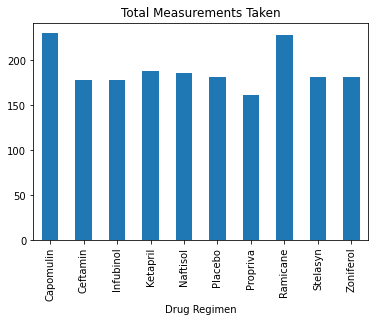

In [188]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = merg_df3.groupby('Drug Regimen')['Mouse ID'].count()
measurements_plot = measurements.plot.bar()
measurements_plot.set_title ('Total Measurements Taken')
y = height()
measurements_plot.bar(x = 'Drug Regimen', y = 'Number of Measurements')
plt.show()

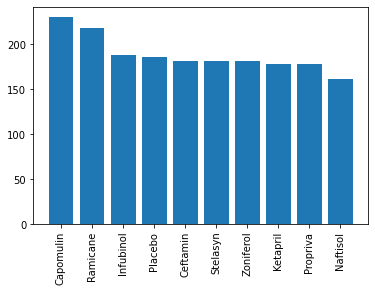

In [172]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = mouse_data['Drug Regimen'].unique()
y_axis = mouse_data['Drug Regimen'].value_counts()
           

#plt.title('Total Measurements Taken')
#plt.ylabel('Number of Measurements')
plt.xticks(rotation='vertical')
plt.bar(x_axis, y_axis)
plt.show()

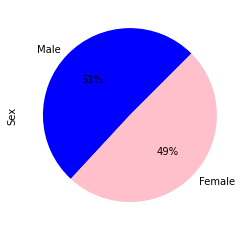

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merg_df3 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
clean_sex_data_df = merg_df3[merg_df3.duplicated(subset=['Timepoint'])]
mouse_data = clean_sex_data_df.set_index('Mouse ID')
pie_df = merg_df3['Sex'].value_counts()
pie_df.plot(kind='pie', colors=['blue', 'pink'],autopct='%1.0f%%', startangle = 45)
plt.show()

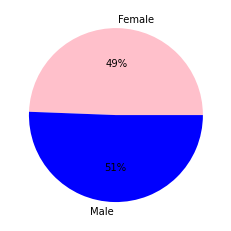

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
merg_df3 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
clean_sex_data_df = merg_df3[merg_df3.duplicated(subset=['Timepoint'])]
mouse_data = clean_sex_data_df.set_index('Mouse ID')
sex = merg_df3.groupby('Sex')['Mouse ID'].count()
labels = list(sex.index)
sex = sex.to_numpy()
colors = ['pink', 'blue']
plt.pie(sex, labels = labels, colors = colors, autopct='%1.0f%%')
plt.show()

# Quartiles, Outliners and Boxplots

In [180]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_setup = merg_df3.set_index('Drug Regimen')
last_tp = merg_df3['Drug Regimen'].isin(['Capomulin, Ramicane, Infubinol, Ceftamin'])
merge_info = merg_df3.get(last_tp, 'Tumor Volume (mm3)')

greatest_time = mouse_data.groupby(['Drug Regimen'])['Timepoint'].max()
greatest_time = greatest_time.reset_index()

last_time_df2 = pd.merge(greatest_time, mouse_data, on=['Mouse ID'])
late_time_df2

KeyError: 'Mouse ID'

In [176]:
#merg this group df with the original dataframe to get the tumor volume at the last timepoint
#Put treatments intoa list for for loop (and later for plot labels)
#Create empty list ot fill with tumor vol data (for plotting)
#Calculate the IQR and quantitatively determine if there are any potential outliners
#Locate the row which contain mice on each drug and get the tumor volumes
#add subset
#Determine outliners using upper and lower bounds
treatments_df = ['Capomulin, Ramicane, Infubinol, Ceftamin']
tumor_vol =[]

for treatment in treatments_df:
    df = last_time_df2.loc[last_time_df2['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(df)
    quartiles = merg_df3['Mouse ID'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")
    outlier_occupancy = merg_df3.loc[(merg_df3['AveOccup'] < lower_bound) | (merg_df3['Mouse ID'] > upper_bound)]
    outlier_occupancy
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

NameError: name 'last_time_df2' is not defined

ValueError: Dimensions of labels and X must be compatible

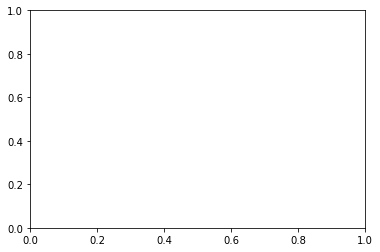

In [177]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
flierprops = dict(marker='x', markerfacecolor='r', markersize=10, markeredgecolor='red')
plt.boxplot(tumor_vol, labels=labels, flierprops=flierprops)

plt.title('Final Volumr by Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

# Line and Scatter Plots

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_a = merg_df3.loc[merg_df3['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Timepoint']]
mouse_b = mouse_a.groupby('Mouse ID')['Age_months'].mean()
merge_mouse = mouse_a.merge(mouse_b, on='Mouse ID')     
clean_mouse = merge_mouse.drop(columns = ['Age_months', 'x'])  
clean_mouse = merge_mouse.drop_duplicates()
mouse_result = clean_mouse.rename(columns = {'Age_months', 'y', 'Age_months'})
mouse_result.plot(kind = 'scatter', x='Timepoint', y= 'Age_months', grid = True, 
                  title = 'Average Age_months vs Mouse Weight for Capomulin Regimen')     
plt.show()  

KeyError: 'Column not found: Age_months'

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_a = merg_df3.loc[merg_df3['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
mouse_b = mouse_a.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merge_mouse = mouse_a.merge(mouse_b, on='Mouse ID')     
#clean_mouse = merge_mouse.drop(columns = ['Tumor Volume (mm3)_x'])  
clean_mouse = merge_mouse.drop_duplicates()
mouse_result = clean_mouse.rename(columns = {'Tumor Volume (mm3)_y': 'Tumor Volume (mm3)'}) 
mouse_result.plot(kind = 'scatter', x='Weight (g)', y= 'Tumor Volume (mm3)', grid = True, 
                  title = 'Average Tumor Volume (mm3) vs Mouse Weight for Capomulin Regimen')     
plt.show()                                                                      

# Correlation and Regression

In [182]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#var = mouse_result.iloc[:,(1)]
#var2 = mouse_result.iloc[:,(2)]
#correlation = st.pearsonr(var,var2)
#plt.scatter(var,var2)
#plt.title = ('Average Tumor Volume (mm3) vs Mouse Weight for Capomulin Regimen')
regimen = 'Capomulin'
regimen_df = mouse_data.loc[mouse_data['Drug Regimen'] == regimen]
avg_tumv = regimen_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': ['mean']})
avg_tumv
weight = regimen_df.groupby('Mouse ID').agg({'Weight (g)': ['mean']})
weight
merged_df = pd.merge(weight, avg_tumv, on='Mouse ID')
merg_df

tumv = merged_df.iloc[:,1]
weight = merged_df.iloc[:,0]
correlation = st.pearsonr(tumv, weight)
print(f"The correlation between both facotrs is{round(correlation[0],2)}")

#Add liner regression
x_values = weight
y_values = tumv
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + 'x + ' + str(roun(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(20,36),fontsize=15,colors='red')
plt.show()

The correlation between both facotrs is0.84


NameError: name 'linregress' is not defined

In [ ]:
plt.ylabel= ('Average Tumor Volume (mm3)')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.show()